In [ ]:
import requests
import datetime

def get_ethereum_transactions(address, api_key):
    # Etherscan API endpoint for fetching transactions
    url = 'https://api.etherscan.io/api'

    # Parameters for the API request
    params = {
        'module': 'account',
        'action': 'txlist',
        'address': address,
        'startblock': 0,       # Start block for transactions
        'endblock': 99999999,  # End block for transactions
        'sort': 'desc',        # Sort transactions by newest first
        'apikey': api_key      # Your Etherscan API key
    }

    # Make the API request
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()

        # Check if the response contains transactions
        if 'status' in data and data['status'] == '1':
            transactions = data.get('result', [])
            print(f"Total transactions found: {len(transactions)}")

            # Print each transaction and analyze gas vs value
            for tx in transactions:
                tx_hash = tx.get('hash', 'N/A')
                tx_from = tx.get('from', 'N/A')
                tx_to = tx.get('to', 'N/A')
                tx_value = int(tx.get('value', 0)) / 10**18  # Convert Wei to Ether
                tx_gas = int(tx.get('gas', 0))
                tx_gas_price = int(tx.get('gasPrice', 0)) / 10**9  # Convert Wei to Gwei

                # Calculate gas used per Ether value
                gas_used_per_ether = tx_gas / tx_value if tx_value > 0 else 0

                # Convert timestamp to a human-readable date
                tx_timestamp = tx.get('timeStamp', 'N/A')
                if tx_timestamp != 'N/A':
                    tx_timestamp = datetime.datetime.fromtimestamp(int(tx_timestamp)).strftime('%Y-%m-%d %H:%M:%S')

                print(f"Hash: {tx_hash}")
                print(f"From: {tx_from}")
                print(f"To: {tx_to}")
                print(f"Value: {tx_value} ETH")
                print(f"Gas Used: {tx_gas}")
                print(f"Gas Price: {tx_gas_price} Gwei")
                print(f"Gas Used per Ether Value: {gas_used_per_ether:.2f} Gas/Ether")
                print(f"Timestamp: {tx_timestamp}")
                print('---')
        else:
            print(f"Error: {data.get('message', 'Unknown error')}")
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")

# Example usage
if __name__ == "__main__":
    # Replace with the Ethereum address you want to track and your Etherscan API key
    address = '0x3E7A68a757334bC8a0bbb778a8f0e7E740b37fcF'
    api_key = 'ZYNK4HTJGWTQKV6NZWFGKDQCN1Q3Y3VACY'

    get_ethereum_transactions(address, api_key)

Total transactions found: 338
Hash: 0x10b46f718d1eb83c98951aa3d7d5a2aa8bef4e8fb162fa57c86d0df0f1303190
From: 0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5
To: 0x3e7a68a757334bc8a0bbb778a8f0e7e740b37fcf
Value: 0.037144221610598854 ETH
Gas Used: 21000
Gas Price: 1.305698432 Gwei
Gas Used per Ether Value: 565363.85 Gas/Ether
Timestamp: 2024-08-19 00:14:47
---
Hash: 0x8d1ca3d70611ae766de080da13f574cfbecf69767e32e1cb0605061b737a2aa8
From: 0xd87f3d6c5624e8b02be13c2c92f8511b88b94d96
To: 0x3e7a68a757334bc8a0bbb778a8f0e7e740b37fcf
Value: 0.028734396457669488 ETH
Gas Used: 21000
Gas Price: 1.668222426 Gwei
Gas Used per Ether Value: 730831.43 Gas/Ether
Timestamp: 2024-08-16 15:19:11
---
Hash: 0x16c31c6c96ed8164a3f0917415a01d386252503c6315ca9ee40e9a0c74c3a0c8
From: 0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5
To: 0x3e7a68a757334bc8a0bbb778a8f0e7e740b37fcf
Value: 0.024030308987429822 ETH
Gas Used: 21000
Gas Price: 1.574606662 Gwei
Gas Used per Ether Value: 873896.38 Gas/Ether
Timestamp: 2024-08-16 11:59

Total transactions found: 338


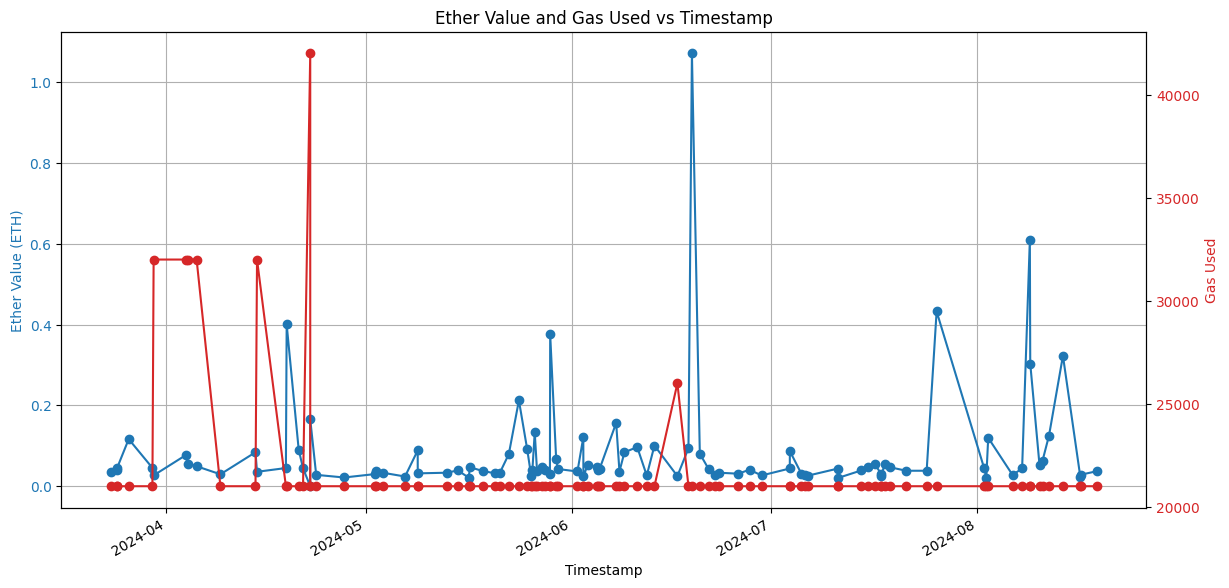

In [ ]:
import requests
import datetime
import matplotlib.pyplot as plt

def get_ethereum_transactions(address, api_key, limit=50):
    # Etherscan API endpoint for fetching transactions
    url = 'https://api.etherscan.io/api'

    # Parameters for the API request
    params = {
        'module': 'account',
        'action': 'txlist',
        'address': address,
        'startblock': 0,       # Start block for transactions
        'endblock': 99999999,  # End block for transactions
        'sort': 'desc',        # Sort transactions by newest first
        'apikey': api_key      # Your Etherscan API key
    }

    # Make the API request
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()

        # Check if the response contains transactions
        if 'status' in data and data['status'] == '1':
            transactions = data.get('result', [])
            total_transactions = len(transactions)
            print(f"Total transactions found: {total_transactions}")

            # Limit to the latest `limit` transactions
            transactions = transactions[:limit]
            timestamps = []
            values = []
            gas_used = []

            # Collect data for plotting
            for tx in transactions:
                tx_value = int(tx.get('value', 0)) / 10**18  # Convert Wei to Ether
                tx_gas = int(tx.get('gas', 0))
                tx_timestamp = int(tx.get('timeStamp', 0))

                # Convert timestamp to a human-readable date
                date_time = datetime.datetime.fromtimestamp(tx_timestamp)
                timestamps.append(date_time)
                values.append(tx_value)
                gas_used.append(tx_gas)

            # Plotting
            fig, ax1 = plt.subplots(figsize=(14, 7))

            # Plot Ether Value on primary y-axis
            color = 'tab:blue'
            ax1.set_xlabel('Timestamp')
            ax1.set_ylabel('Ether Value (ETH)', color=color)
            ax1.plot(timestamps, values, marker='o', linestyle='-', color=color)
            ax1.tick_params(axis='y', labelcolor=color)
            ax1.set_title('Ether Value and Gas Used vs Timestamp')
            ax1.grid(True)

            # Create secondary y-axis for Gas Used
            ax2 = ax1.twinx()
            color = 'tab:red'
            ax2.set_ylabel('Gas Used', color=color)
            ax2.plot(timestamps, gas_used, marker='o', linestyle='-', color=color)
            ax2.tick_params(axis='y', labelcolor=color)

            # Rotate x-axis labels for better readability
            fig.autofmt_xdate()
            plt.show()

        else:
            print(f"Error: {data.get('message', 'Unknown error')}")
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")

# Example usage
if __name__ == "__main__":
    # Replace with the Ethereum address you want to track and your Etherscan API key
    address = '0x3E7A68a757334bC8a0bbb778a8f0e7E740b37fcF'
    api_key = 'ZYNK4HTJGWTQKV6NZWFGKDQCN1Q3Y3VACY'

    get_ethereum_transactions(address, api_key, limit=100)
